[click here to watch the video] (https://drive.google.com/file/d/177aecv6BrDxEplbWyDQQO5bwRIqgV_Th/view?usp=sharing)  #Videopresentation


In [25]:
#task 1(a)
import pandas as pd

#import excel file
file_path = r"C:\Users\HP\Downloads\FEV-data-Excel.xlsx"
data = pd.ExcelFile(file_path)


ev_data = data.parse('Auta elektryczne')

#define customer criteria
budget = 350000
min_range = 400

filtered_ev_data = ev_data[
    (ev_data['Minimal price (gross) [PLN]'] <= budget) &
    (ev_data['Range (WLTP) [km]'] >= min_range)
]

filtered_ev_data.reset_index(drop=True, inplace=True)

print(filtered_ev_data)

                        Car full name           Make  \
0              Audi e-tron 55 quattro           Audi   
1                             BMW iX3            BMW   
2         Hyundai Kona electric 64kWh        Hyundai   
3                    Kia e-Niro 64kWh            Kia   
4                    Kia e-Soul 64kWh            Kia   
5                   Mercedes-Benz EQC  Mercedes-Benz   
6   Tesla Model 3 Standard Range Plus          Tesla   
7            Tesla Model 3 Long Range          Tesla   
8           Tesla Model 3 Performance          Tesla   
9     Volkswagen ID.3 Pro Performance     Volkswagen   
10              Volkswagen ID.3 Pro S     Volkswagen   
11                Volkswagen ID.4 1st     Volkswagen   

                          Model  Minimal price (gross) [PLN]  \
0             e-tron 55 quattro                       345700   
1                           iX3                       282900   
2           Kona electric 64kWh                       178400   
3              

In [27]:
#task 1(b)
import pandas as pd

#load the excel file
file_path = r"C:\Users\HP\Downloads\FEV-data-Excel.xlsx"
data= pd.ExcelFile(file_path)

ev_data = data.parse('Auta elektryczne')

budget = 350000
min_range = 400

filtered_ev_data = ev_data[
    (ev_data['Minimal price (gross) [PLN]'] <= budget) &
    (ev_data['Range (WLTP) [km]'] >= min_range)
]

grouped_by_make = filtered_ev_data.groupby('Make')

for make, group in grouped_by_make:
    print(f"Manufacturer: {make}")
    print(group[['Car full name', 'Minimal price (gross) [PLN]', 'Range (WLTP) [km]']])
    print("-" * 50)


Manufacturer: Audi
            Car full name  Minimal price (gross) [PLN]  Range (WLTP) [km]
0  Audi e-tron 55 quattro                       345700                438
--------------------------------------------------
Manufacturer: BMW
  Car full name  Minimal price (gross) [PLN]  Range (WLTP) [km]
8       BMW iX3                       282900                460
--------------------------------------------------
Manufacturer: Hyundai
                  Car full name  Minimal price (gross) [PLN]  \
15  Hyundai Kona electric 64kWh                       178400   

    Range (WLTP) [km]  
15                449  
--------------------------------------------------
Manufacturer: Kia
       Car full name  Minimal price (gross) [PLN]  Range (WLTP) [km]
18  Kia e-Niro 64kWh                       167990                455
20  Kia e-Soul 64kWh                       160990                452
--------------------------------------------------
Manufacturer: Mercedes-Benz
        Car full name  Minimal 

In [29]:
#task 1 (c)
import pandas as pd

#import excel file
file_path = r"C:\Users\HP\Downloads\FEV-data-Excel.xlsx"
data = pd.ExcelFile(file_path)


ev_data = data.parse('Auta elektryczne')

#define customer criteria
budget = 350000
min_range = 400

filtered_ev_data = ev_data[
    (ev_data['Minimal price (gross) [PLN]'] <= budget) &
    (ev_data['Range (WLTP) [km]'] >= min_range)
]

average_battery_capacity = (
    filtered_ev_data.groupby('Make')['Battery capacity [kWh]']
    .mean()
    .reset_index()
)

average_battery_capacity.columns = ['Manufacturer', 'Average Battery Capacity (kWh)']

print(average_battery_capacity)

    Manufacturer  Average Battery Capacity (kWh)
0           Audi                       95.000000
1            BMW                       80.000000
2        Hyundai                       64.000000
3            Kia                       64.000000
4  Mercedes-Benz                       80.000000
5          Tesla                       68.000000
6     Volkswagen                       70.666667


In [33]:
#task 2
import pandas as pd

#import excel file
file_path = r"C:\Users\HP\Downloads\FEV-data-Excel.xlsx"
data = pd.ExcelFile(file_path)


ev_data = data.parse('Auta elektryczne')

energy_consumption = ev_data['mean - Energy consumption [kWh/100 km]']
#calculate the IQR
Q1 = energy_consumption.quantile(0.25)
Q3 = energy_consumption.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 - 1.5 * IQR


outliers = ev_data[
     (energy_consumption < lower_bound) | (energy_consumption > upper_bound)
]

print("outliers in mean - Energy consumption [kWh/100 km]:")
print(outliers[['Car full name', 'Make', 'mean - Energy consumption [kWh/100 km]']])


outliers in mean - Energy consumption [kWh/100 km]:
                           Car full name           Make  \
0                 Audi e-tron 55 quattro           Audi   
1                 Audi e-tron 50 quattro           Audi   
2                  Audi e-tron S quattro           Audi   
3       Audi e-tron Sportback 50 quattro           Audi   
4       Audi e-tron Sportback 55 quattro           Audi   
5        Audi e-tron Sportback S quattro           Audi   
6                                 BMW i3            BMW   
7                                BMW i3s            BMW   
8                                BMW iX3            BMW   
10              DS DS3 Crossback e-tense             DS   
11                               Honda e          Honda   
12                       Honda e Advance          Honda   
13                Hyundai Ioniq electric        Hyundai   
14         Hyundai Kona electric 39.2kWh        Hyundai   
15           Hyundai Kona electric 64kWh        Hyundai   
16  

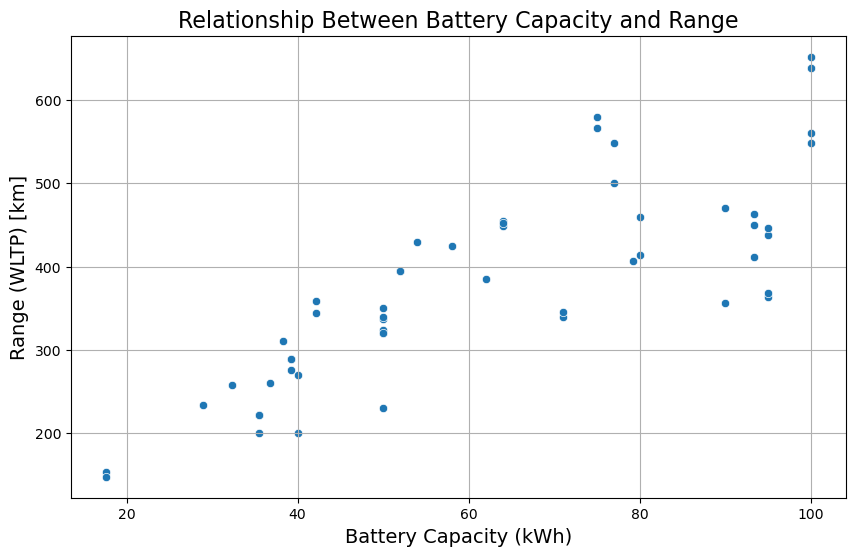

In [39]:
#task 3 (a)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#import excel file
file_path = r"C:\Users\HP\Downloads\FEV-data-Excel.xlsx"
data = pd.ExcelFile(file_path)


ev_data = data.parse('Auta elektryczne')
#extract relevant columns for the analysis 
battery_capacity = ev_data['Battery capacity [kWh]']
range_wltp = ev_data ['Range (WLTP) [km]']

plt.figure(figsize=(10, 6))
sns.scatterplot(x=battery_capacity, y=range_wltp)
#add titles and labels
plt.title('Relationship Between Battery Capacity and Range', fontsize=16)
plt.xlabel('Battery Capacity (kWh)', fontsize=14)
plt.ylabel('Range (WLTP) [km]', fontsize=14)

#show the  plot 
plt.grid(True)
plt.show()

In [ ]:
#task 3(b) #insights
#1 high correlation: if the correlation coeffecient is close to 1, its suggests a strong linear relationship: vehicles with higher battery capacity tend to have a longer range
#2 Moderate Correlation: Acoffeicent between 0.5 and 1.0 
#3 outliers : looks for points far from the trend line.

In [ ]:
#task 4 
import pandas as pd

class EVRecommendation:
    def __init__(self, data_path, sheet_name):
        r"""
        Initialize the EVRecommendation class.
        :param data_path: r"C:\Users\HP\Downloads\FEV-data-Excel.xlsx"
        :param sheet_name: 'Auta elektryczne'.
       """
        self_data = pd.read_excel(data_path, sheet_name=sheet_name)

    def recommend_evs(self, budget, desired_range, min_battery_capacity):
       """
       Recommend the top three EVs based on user criteria.
       :param budget: Maximum budget in PLN.
       :param desired_range: Minimum range (WLTP) in km.
       :param min_battery_capacity: Minimum battery capacity in kWh.
       :return: DataFrame with the top three EVs matching the criteria.
       """
       #filter EVs based on criteria
       filtered_evs = self.data[
           (self.data['Minimal price (gross) [PLN]'] <= budget) &
           (self.data['Range (WLTP) [km]'] >= desired_range) &
           (self.data['Battery capacity [kWh]'] >= min_battery_capacity)
       ]

       recommended_evs = filtered_evs.sort_values(
           by=['Minimal price (gross) [PLN]', 'Range (WLTP) [km]'],
           ascending=[True, False]
       ).head(3)

       return recommend_evs[['Car full name', 'Make', 'Minimal price (gross) [PLN]', 'Range (WLTP) [km]', 'Battery capacity [kWh]']]

file_path = r"C:\Users\HP\Downloads\FEV-data-Excel.xlsx"
sheet_name = 'Auta elektryczne'

ev_recommender = EVRecommendation(file_path, sheet_name)

user_budget = 350000
user_desired_range = 400
user_min_battery_capacity = 60

#top evs
top_evs = ev_recommender.recommended_evs(user_budget, user_desired_range, user_min_battery_capacity)
print("Top EV Recommendations:")
print(top_evs)

       
        

In [1]:
#task 5
import pandas as pd
from scipy.stats import ttest_ind

#import excel file
file_path = r"C:\Users\HP\Downloads\FEV-data-Excel.xlsx"
data = pd.ExcelFile(file_path)


ev_data = data.parse('Auta elektryczne')
#filter the data for tesla and audi
tesla_data = ev_data[ev_data['Make'] == 'Tesla']['Engine power [KM]']
audi_data = ev_data[ev_data['Make'] == 'Audi']['Engine power [KM]']

t_stat, p_value = ttest_ind(tesla_data, audi_data, equal_var=False) 
#print the results
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

alpha = 0.05 
if p_value < alpha:
    print("There is a significant difference in the average Engine Power [KM] between Tesla and Audi.")
else:
    print("There is no significant difference in the average Engine Power [KM] between Tesla and Audi.")

T-Statistic: 1.79
P-Value: 0.1068
There is no significant difference in the average Engine Power [KM] between Tesla and Audi.


In [ ]:
#Insights and recommendations:
# 1. Insights: if the test series reveals a significant difference, it indicates Tesla and Audivehicles have distinct engine power
#. if there no's significant difference, its suggests their engine power is similar despite differences in other factors

#2. Recommendations:
#for Tesla: if tesla has higher average engine power, emphasize this as competitve advantage in performance- oriented markets.
# For Audi : if Audi matches tesla's engine power , promote this parity in marketing campaigns.

# future analysis : extend the analysis to compare other features like range, price , other features to identify further competitive advantages.
#analyze customer preferences for performance versus other factors.

